In [258]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import hvplot.pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [259]:
load_dotenv()

True

In [260]:
portfolio_data = Path("../Resources/Project_1_Tickers_Updated.csv")
portfolio = pd.read_csv(portfolio_data)
portfolio 

portfolio["PortFolio Weight"] = portfolio["PortFolio Weight"].astype(str).str.replace("%", "")
portfolio["PortFolio Weight"] = portfolio["PortFolio Weight"].astype("float")

portfolio

tickers = portfolio["Ticker"].tolist()
tickers

portfolio_weights = portfolio["PortFolio Weight"].tolist()
portfolio_weights



[0.59,
 0.88,
 0.66,
 0.29,
 1.91,
 1.25,
 13.66,
 11.09,
 0.44,
 3.89,
 1.32,
 2.64,
 3.45,
 0.66,
 1.25,
 8.0,
 3.52,
 1.84,
 2.28,
 3.3,
 0.81,
 2.13,
 2.35,
 2.64,
 1.1,
 4.04,
 1.25,
 1.62,
 3.6,
 0.73,
 4.92,
 0.66,
 10.43,
 0.81,
 1.32]

In [261]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [262]:
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2013-2-13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-02-13", tz="America/New_York").isoformat()


df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data


df_ticker = df_ticker[["close", "symbol"]]

df_ticker.head()

,close,symbol
timestamp,,
2015-12-01 05:00:00+00:00,117.34,AAPL
2015-12-02 05:00:00+00:00,116.28,AAPL
2015-12-03 05:00:00+00:00,115.20,AAPL
2015-12-04 05:00:00+00:00,119.03,AAPL
2015-12-07 05:00:00+00:00,118.28,AAPL


In [263]:
df_ticker['Date'] = pd.to_datetime(df_ticker.index).date

df_ticker = df_ticker.set_index("Date")


In [264]:
df_ticker

,close,symbol
Date,,
2015-12-01,117.34,AAPL
2015-12-02,116.28,AAPL
2015-12-03,115.20,AAPL
2015-12-04,119.03,AAPL
2015-12-07,118.28,AAPL
...,...,...
2023-02-07,114.92,XOM
2023-02-08,113.92,XOM
2023-02-09,114.35,XOM


In [265]:

ABBV = df_ticker[df_ticker['symbol']=='ABBV'].drop('symbol', axis=1)
ACN = df_ticker[df_ticker['symbol']=='ACN'].drop('symbol', axis=1)
APD = df_ticker[df_ticker['symbol']=='APD'].drop('symbol', axis=1)
AMGN = df_ticker[df_ticker['symbol']=='AMGN'].drop('symbol', axis=1)
APO = df_ticker[df_ticker['symbol']=='APO'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
T = df_ticker[df_ticker['symbol']=='T'].drop('symbol', axis=1)
BAC = df_ticker[df_ticker['symbol']=='BAC'].drop('symbol', axis=1)
AVGO = df_ticker[df_ticker['symbol']=='AVGO'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)
CCI = df_ticker[df_ticker['symbol']=='CCI'].drop('symbol', axis=1)
ETN = df_ticker[df_ticker['symbol']=='ETN'].drop('symbol', axis=1)
XOM = df_ticker[df_ticker['symbol']=='XOM'].drop('symbol', axis=1)
HD = df_ticker[df_ticker['symbol']=='HD'].drop('symbol', axis=1)
IBM = df_ticker[df_ticker['symbol']=='IBM'].drop('symbol', axis=1)
QQQ = df_ticker[df_ticker['symbol']=='QQQ'].drop('symbol', axis=1)
RPV = df_ticker[df_ticker['symbol']=='RPV'].drop('symbol', axis=1)
JNJ = df_ticker[df_ticker['symbol']=='JNJ'].drop('symbol', axis=1)
JPM = df_ticker[df_ticker['symbol']=='JPM'].drop('symbol', axis=1)
MDT = df_ticker[df_ticker['symbol']=='MDT'].drop('symbol', axis=1)
MRK = df_ticker[df_ticker['symbol']=='MRK'].drop('symbol', axis=1)
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
NEE = df_ticker[df_ticker['symbol']=='NEE'].drop('symbol', axis=1)
NKE = df_ticker[df_ticker['symbol']=='NKE'].drop('symbol', axis=1)
PEP = df_ticker[df_ticker['symbol']=='PEP'].drop('symbol', axis=1)
PFE = df_ticker[df_ticker['symbol']=='PFE'].drop('symbol', axis=1)
PG = df_ticker[df_ticker['symbol']=='PG'].drop('symbol', axis=1)
PLD = df_ticker[df_ticker['symbol']=='PLD'].drop('symbol', axis=1)
O = df_ticker[df_ticker['symbol']=='O'].drop('symbol', axis=1)
SHW = df_ticker[df_ticker['symbol']=='SHW'].drop('symbol', axis=1)
KRE = df_ticker[df_ticker['symbol']=='KRE'].drop('symbol', axis=1)
UNH = df_ticker[df_ticker['symbol']=='UNH'].drop('symbol', axis=1)
VZ = df_ticker[df_ticker['symbol']=='VZ'].drop('symbol', axis=1)
V = df_ticker[df_ticker['symbol']=='V'].drop('symbol', axis=1)
WMT = df_ticker[df_ticker['symbol']=='WMT'].drop('symbol', axis=1)




In [266]:
display(WMT)

,close
Date,
2015-12-01,58.99
2015-12-02,58.35
2015-12-03,59.04
2015-12-04,59.66
2015-12-07,60.50
...,...
2023-02-07,140.98
2023-02-08,140.22
2023-02-09,141.52


In [267]:
df_ticker = pd.concat([ABBV,
 ACN,
 APD,
 AMGN,
 APO,
 AAPL,
 T,
 BAC,
 AVGO,
 KO,
 CCI,
 ETN,
 XOM,
 HD,
 IBM,
 QQQ,
 RPV,
 JNJ,
 JPM,
 MDT,
 MRK,
 MSFT,
 NEE,
 NKE,
 PEP,
 PFE,
 PG,
 PLD,
 O,
 SHW,
 KRE,
 UNH,
 VZ,
 V,
 WMT], axis=1, keys=['ABBV',
 'ACN',
 'APD',
 'AMGN',
 'APO',
 'AAPL',
 'T',
 'BAC',
 'AVGO',
 'KO',
 'CCI',
 'ETN',
 'XOM',
 'HD',
 'IBM',
 'QQQ',
 'RPV',
 'JNJ',
 'JPM',
 'MDT',
 'MRK',
 'MSFT',
 'NEE',
 'NKE',
 'PEP',
 'PFE',
 'PG',
 'PLD',
 'O',
 'SHW',
 'KRE',
 'UNH',
 'VZ',
 'V',
 'WMT'])




In [284]:
pd.set_option('display.max_rows', 30)
daily_returns = df_ticker.pct_change()
daily_returns

,ABBV,ACN,APD,AMGN,APO,AAPL,T,BAC,AVGO,KO,...,PFE,PG,PLD,O,SHW,KRE,UNH,VZ,V,WMT
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-02,-0.022026,-0.004994,0.003623,-0.009013,-0.004960,-0.009034,-0.006219,-0.010668,-0.005117,-0.002798,...,-0.021416,-0.001975,-0.030227,-0.019953,-0.015672,-0.017705,0.011870,-0.014480,-0.010887,-0.010849
2015-12-03,-0.027720,-0.015429,-0.019711,-0.036569,-0.023676,-0.009288,-0.013707,-0.018161,0.095076,-0.007248,...,-0.015502,-0.000660,-0.020543,-0.016730,-0.026353,-0.014909,-0.022441,-0.008014,-0.009489,0.011825
2015-12-04,0.018888,0.029925,0.019666,0.043841,0.011487,0.033247,0.030514,0.028902,0.019202,0.019548,...,0.012658,0.027594,0.029412,0.025215,0.024097,0.016941,0.023826,0.025808,0.026951,0.010501
2015-12-07,-0.015915,-0.001467,-0.011774,-0.019389,-0.009464,-0.006301,0.004691,-0.014607,0.008607,-0.002079,...,-0.004268,0.006938,-0.000937,0.005199,-0.006681,-0.021546,-0.015543,0.007657,-0.010572,0.014080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,0.000827,0.011741,0.007208,0.000615,0.016773,0.019245,-0.016854,0.010998,0.021869,-0.001662,...,-0.003885,-0.009760,-0.008901,-0.005315,-0.018887,0.010764,0.003451,-0.017684,0.008194,0.002132
2023-02-08,-0.003652,-0.010805,0.007612,-0.015574,0.007362,-0.017653,-0.004675,-0.007343,-0.020734,-0.005827,...,0.008947,-0.010356,-0.003608,-0.002227,-0.012288,-0.011267,0.013295,-0.000740,-0.004842,-0.005391


In [119]:
daily_returns.describe()

,ABBV,ACN,APD,AMGN,APO,AAPL,T,BAC,AVGO,KO,...,PFE,PG,PLD,O,SHW,KRE,UNH,VZ,V,WMT
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,...,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,0.000677,0.000674,0.000532,0.000656,0.001113,0.000685,-0.000192,0.000604,0.001074,0.000266,...,0.000262,0.000412,0.000749,0.000320,0.000291,0.000378,0.000942,0.000006,0.000720,0.000599
std,0.017158,0.016314,0.016027,0.030997,0.024338,0.026438,0.015265,0.021016,0.021835,0.012204,...,0.015069,0.012186,0.017228,0.017807,0.023445,0.019879,0.016829,0.012161,0.016719,0.014065
min,-0.162524,-0.083899,-0.126042,-0.466049,-0.159012,-0.741522,-0.186827,-0.175911,-0.199129,-0.096725,...,-0.083461,-0.075792,-0.172706,-0.249305,-0.661590,-0.136557,-0.172769,-0.067352,-0.138600,-0.113758
25%,-0.007292,-0.006478,-0.006301,-0.007270,-0.010521,-0.007571,-0.006452,-0.009390,-0.009832,-0.004629,...,-0.006788,-0.005152,-0.007298,-0.007242,-0.007651,-0.009200,-0.006789,-0.005891,-0.006899,-0.005706
50%,0.001175,0.001387,0.000528,0.000302,0.001446,0.000889,0.000342,0.000604,0.001350,0.000654,...,0.000000,0.000596,0.001167,0.001128,0.000724,0.000374,0.000864,0.000000,0.001370,0.000570
75%,0.008562,0.008309,0.007620,0.007885,0.012871,0.010541,0.006864,0.010731,0.012565,0.005956,...,0.007071,0.006396,0.009469,0.008410,0.008836,0.010148,0.008350,0.006310,0.008529,0.006902
max,0.137673,0.128573,0.137233,0.875546,0.262373,0.167193,0.079211,0.163164,0.158337,0.064796,...,0.108552,0.089770,0.113303,0.169128,0.144492,0.154255,0.127989,0.076802,0.138426,0.117085


<AxesSubplot: ylabel='Frequency'>

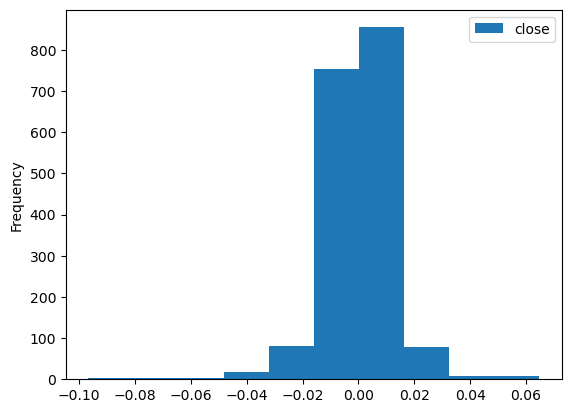

In [159]:
daily_returns["KO"].plot.hist()

In [179]:
daily_returns["MSFT"].plot.scatter("close")

TypeError: scatter() missing 1 required positional argument: 'y'

<AxesSubplot: xlabel='None-None', ylabel='None-None'>

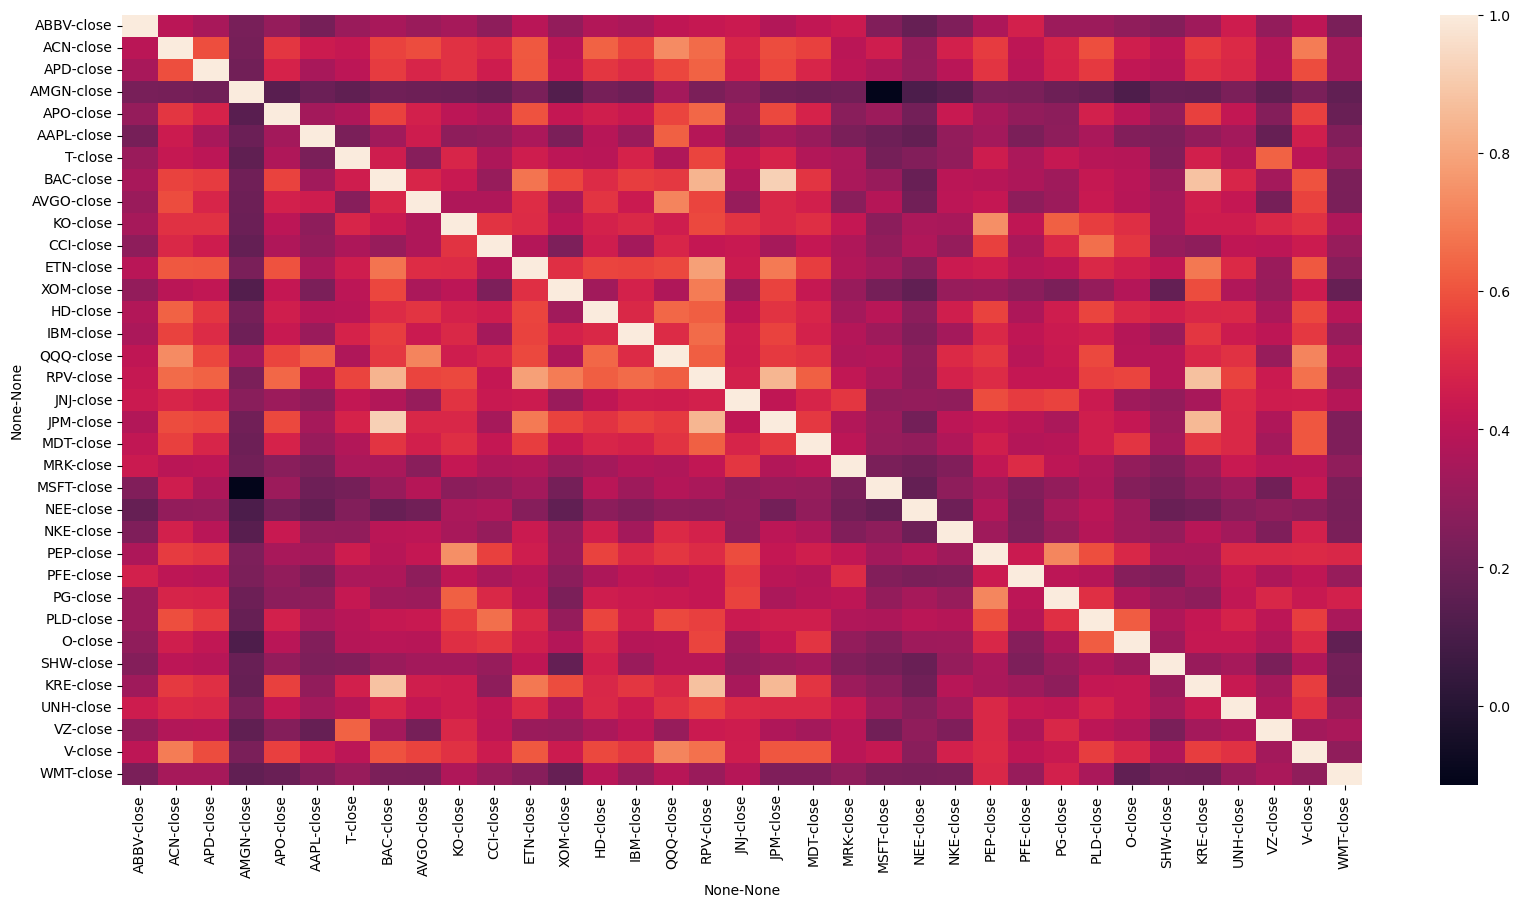

In [153]:
correlation = daily_returns.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, ax =ax)

In [287]:
portfolio_returns = daily_returns.dot(portfolio_weights)
portfolio_returns

Date
2015-12-01         NaN
2015-12-02   -1.195358
2015-12-03   -1.364689
2015-12-04    2.296373
2015-12-07   -0.451463
                ...   
2023-02-07    0.260475
2023-02-08   -0.562464
2023-02-09   -1.328244
2023-02-10    0.552428
2023-02-13    0.951870
Length: 1813, dtype: float64

In [245]:
df_ticker = df_ticker.values.tolist()
daily_returns = daily_returns.values.tolist()

In [254]:
our_returns = []
def get_returns(weight, daily, stocks):
    for i in range(0, len(portfolio_weights)):
        print(our_returns)
        change = weight[i] * daily[i][i]
        our_returns.append(change)
    return our_returns
get_returns(portfolio_weights, daily_returns, df_ticker)




[]
[nan]
[nan, -0.00439471007121047]
[nan, -0.00439471007121047, -0.01300938628158837]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991, -0.0005284071694285075]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991, -0.0005284071694285075, -0.1129926144756287]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991, -0.0005284071694285075, -0.1129926144756287, 0.06485380116959003]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991, -0.0005284071694285075, -0.1129926144756287, 0.06485380116959003, -0.008690694359600952]
[nan, -0.00439471007121047, -0.01300938628158837, 0.012713870029097933, -0.01807570977917991, -0.0005284071694285075, -0.1129926144756287, 0.064853

[nan,
 -0.00439471007121047,
 -0.01300938628158837,
 0.012713870029097933,
 -0.01807570977917991,
 -0.0005284071694285075,
 -0.1129926144756287,
 0.06485380116959003,
 -0.008690694359600952,
 0.016564939673527193,
 0.009295774647887311,
 0.07359430604982198,
 -0.05186986734049331,
 -0.00532622763608678,
 0.005559673832468415,
 0.052588923908150065,
 0.07611587107303101,
 0.004089283988791213,
 -0.0075315315315315386,
 0.028647317958019336,
 -0.0013667041619798016,
 -0.03139584443260547,
 -0.007238425257484172,
 0.03690507152145662,
 0.0003318250377073895,
 -0.026839607719076328,
 -0.019597045866805024,
 -0.001972242512782985,
 0.01101970537593271,
 -0.015582339095852606,
 0.04116599190283472,
 -0.008878656554712944,
 0.10329056943506675,
 -0.008055750105056651,
 0.022564102564102486]

In [256]:
initial_investment = 10000
our_returns_sum = our_returns.dropna().sum()
our_returns_sum

AttributeError: 'list' object has no attribute 'dropna'

In [186]:
cumulative_returns = (1 + our_returns).sum()
(initial_investment * cumulative_returns).plot()

TypeError: unsupported operand type(s) for +: 'int' and 'list'